# Predicting House Prices

Kaggle Link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview


## 1. Problem Definition

`How well can we predict the house prices of homes in Iowa based on training set data with the different factors/variables that go into price negotiations` 

## 2. Data

Train and Test set is provided by Kaggle. 

## 3. Evaluation

RMSLE is used to evaluate the predictive model. 

## 4. Features

Data Dictionary:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data



## Import necessary tools

In [270]:
# Import data analysis tools 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [402]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

## Introductory Data Exploration

Start to inspect the training and testing set overall.

In [272]:
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [403]:
df_train.shape

(1460, 81)

In [274]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Initial Observations: 
    
1. Several variables are categorical, and will need to be either dropped, or changed to integers. 
2. Several variables are missing values and will need to be imputed. Variables with far too many missing values will perhaps be dropped to avoid artifically influencing the data too much. 

The next step would be to start to visualize these variables, and begin to see perhaps which variables influence Sale Price, and how. 

# Exploratory Data Analysis

In [275]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

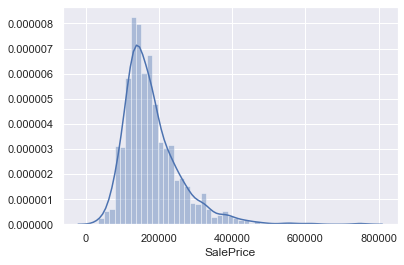

In [276]:
sns.distplot(df_train["SalePrice"])

In [277]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


**Note:** We can immediately notice that the target variable is heavily positively skewed, and that it has high kurtosis, in this case called leptokurtic, indicating high amounts of outliers. Outliers, along with missing values and categorical variables, will be taken care of in the data processing step. 

In [278]:
def plot_numfeature(feature):
    
    var = feature
    prices = df_train["SalePrice"]
    
    fig, ax = plt.subplots(figsize=(10,6))
    

    data = pd.concat([prices, df_train[var]], axis=1)
    ax.scatter(x=var, y='SalePrice', data=data)
    ax.set_xlabel(var)
    ax.set_ylabel("SalePrice")
    ax.set_title("SalePrice based on " + var)


In [279]:
def plot_catfeatures(feature):
    
    var = feature
    prices = df_train["SalePrice"]
    
    fig, ax = plt.subplots(figsize=(10,6))
    
    sns.barplot(data=df_train, x=var, y="SalePrice", estimator=np.mean, ax=ax)
    ax.set_title("SalePrice based on " + var)
    

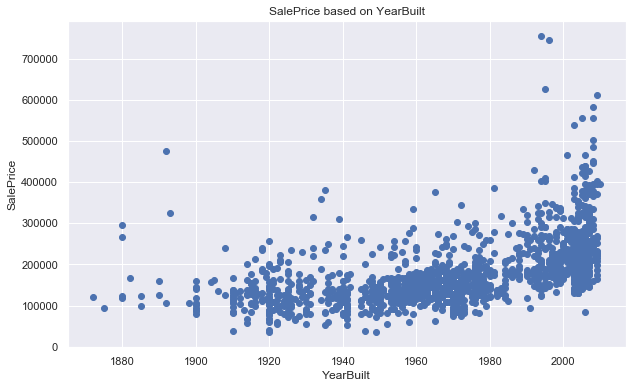

In [280]:
plot_numfeature('YearBuilt')


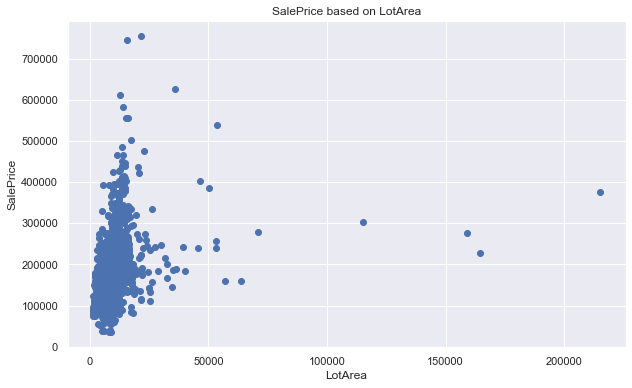

In [281]:
plot_numfeature('LotArea')

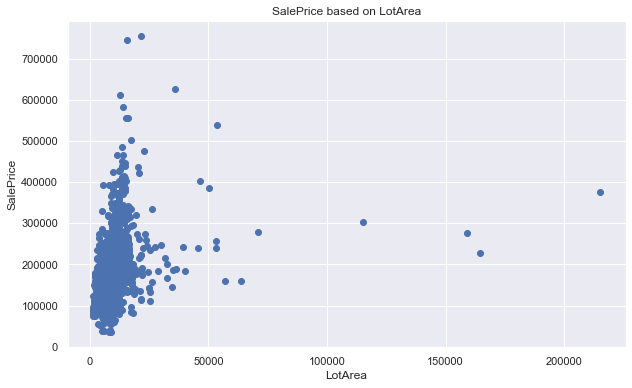

In [282]:
plot_numfeature('LotArea')

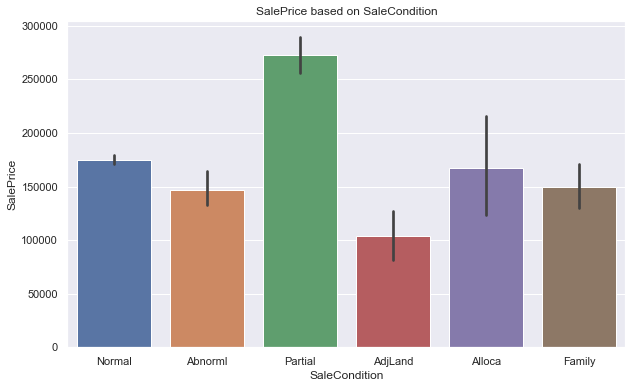

In [283]:
plot_catfeatures('SaleCondition')

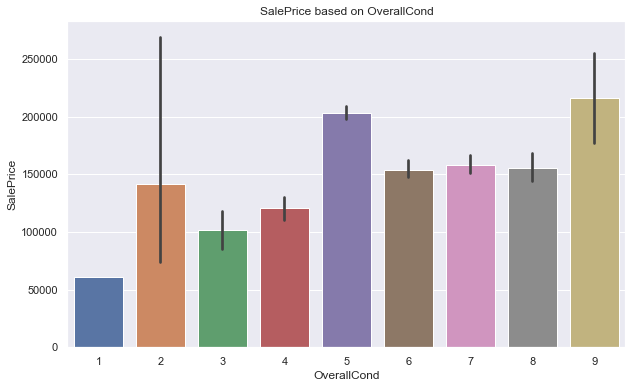

In [284]:
plot_catfeatures('OverallCond')

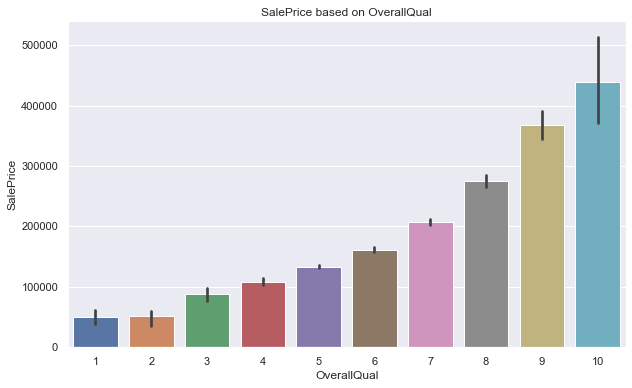

In [285]:
plot_catfeatures('OverallQual')

**Note:** Thus far, variables have been chosen subjectively to compare with SalePrice. However, there are far too many variables to test individually. A smarter approach may be to use a correlation matrix to get a snapshot of what variables are most correlated with SalePrice and then visualize those. 

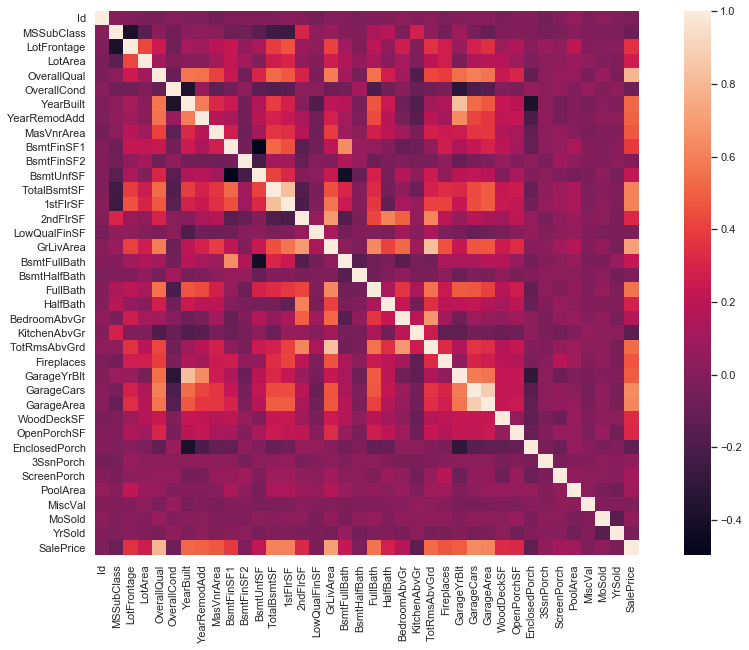

In [286]:
fig, ax = plt.subplots(figsize=(16,10))

corrmat = df_train.corr()

sns.heatmap(corrmat, square=True)

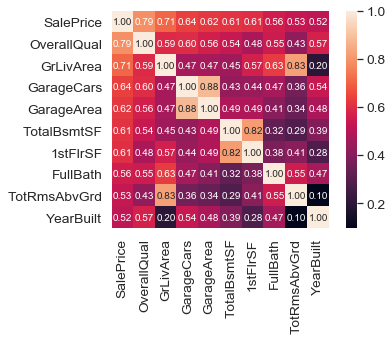

In [287]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**Note:** From the above, we can see the 10 most highly correlated variables. This allows us to focus our attention on visualizing these variables

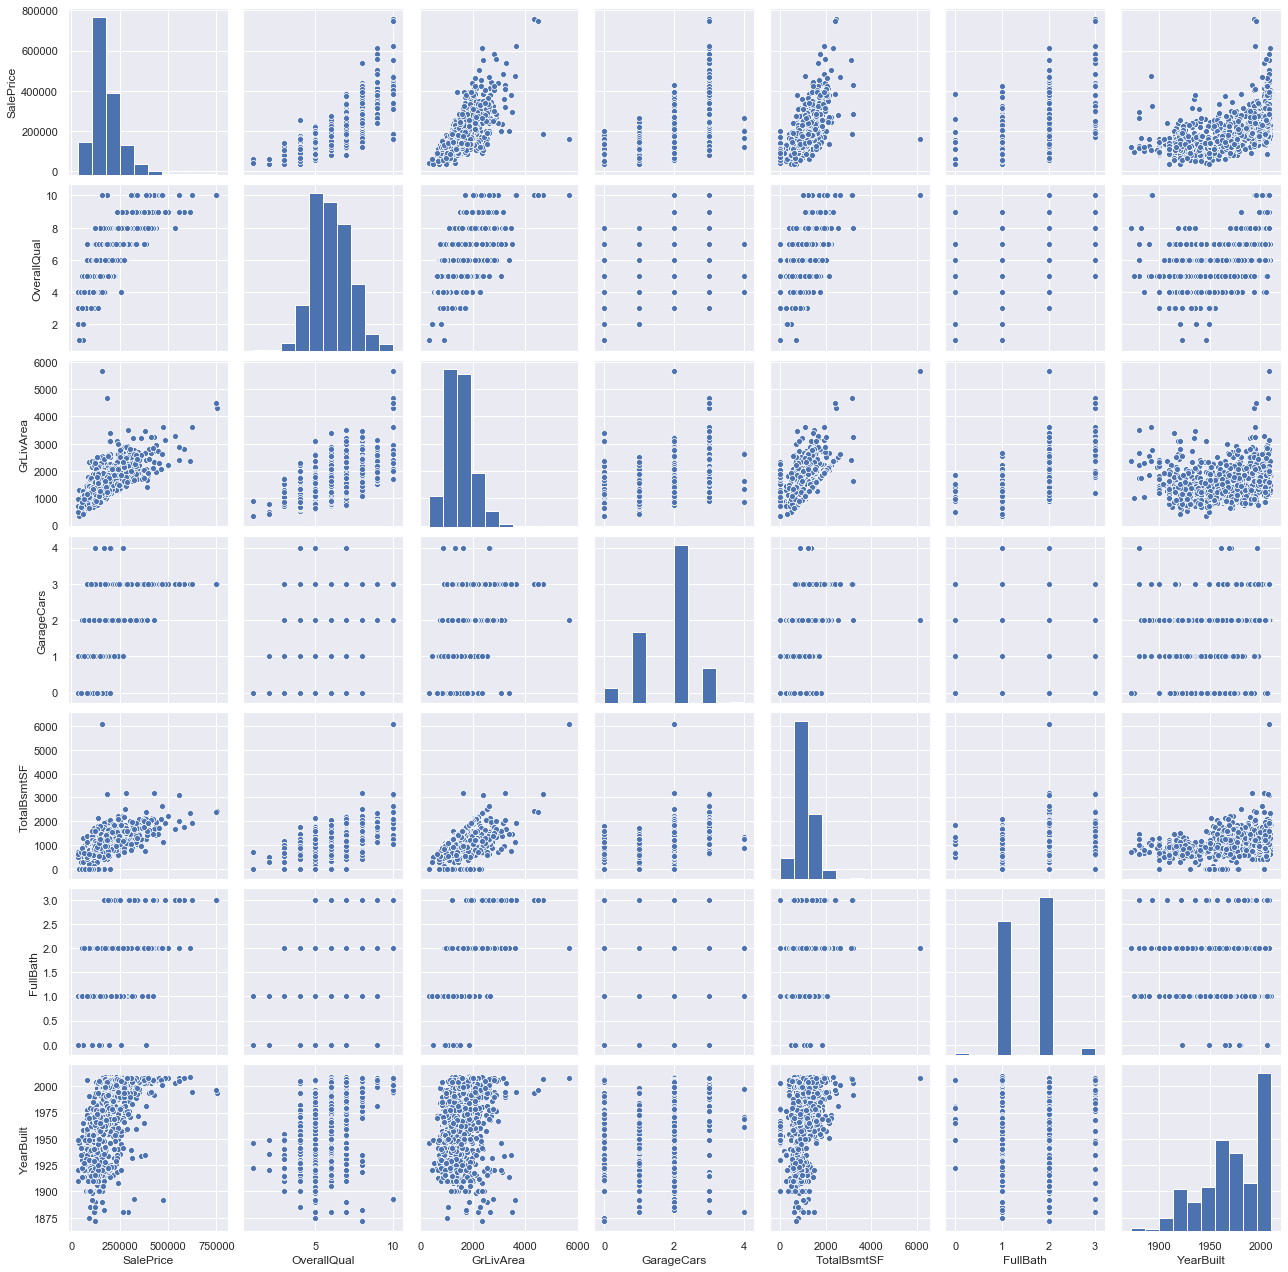

In [288]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], height = 2.5)
plt.show();

**NOTE:** From the above plot, we can see how the most correlated variables correlate with SalePrice, and to each other.

 # Data Processing

## Dealing with Outliers/Skewed Data

Outliers can skew data and negatively influence our models. Before we feature engineer, we'll remove outliers to simplify and linearize data.

In [411]:
# The Ids are not necessary from either the train and test and can be removed
train_ID = df_train["Id"]
test_ID = df_test["Id"]

df_train = df_train.drop("Id", axis=1)
df_test = df_test.drop("Id", axis=1)

In [531]:
# Check Skewed Variables
from scipy.stats import skew

skewed = df_train.skew(axis = 0, skipna = True).sort_values(ascending=False)
skewness = pd.DataFrame({"Skew" :skewed})

# Only include highly skewed variables 
skewness = skewness[abs(skewness) > 0.50].dropna()
skewed_features = skewness.index

for feature in skewed_features:
    df_train[feature] = np.log1p(df_train[feature])

In [532]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 0.121347
Kurtosis: 0.809519


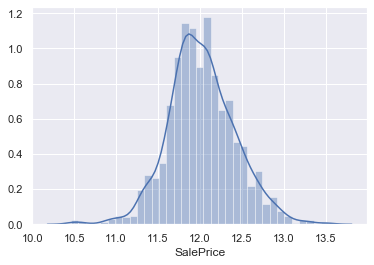

In [533]:
sns.distplot(df_train["SalePrice"])

From the above graph, we can now see the `SalePrice` has been adjusted to fit a normal distribution. 

# Feature Engineering

Note that Feature Engineering will be done independently on both the train and test set to ensure both are engineered with the same methods without being influenced by each other. We will focus on 3 main things:

1. Missing Values
2. Categorical Values
3. Removing redundant (collinear) columns and combining others for simplicity

## 1. Missing Values

There are two main approaches we can take. Either fill/impute all missing values for each variable, or drop columns with missing values entirely. For the sake of completion, we will first attempt the former method, and adjust accordingly during our model evaluation process.

In [415]:
def replace_missing_values(dataset):

    numeric = [i for i in dataset.columns if dataset.dtypes[i] != 'object']
    categorical = [i for i in dataset.columns if dataset.dtypes[i] == 'object']

    # Fill in numeric values
    for j in numeric:
        dataset.fillna(dataset.median(), inplace=True)
    
    # Fill in categorical values
    for j in categorical:
        dataset[j].fillna(dataset[j].mode()[0], inplace=True)
    
    # Fill in for corner cases
    corner_cases = ['MiscFeature', 'PoolQC']
    
    for j in corner_cases:
        dataset[j] = dataset[j].fillna('None')
    
    return dataset

In [417]:
df_test_replaced = replace_missing_values(df_test)
df_train_replaced = replace_missing_values(df_train)

## 2. Cateogrical Variables

In [419]:
df_train_dummy = pd.get_dummies(df_train_replaced, prefix_sep='_', drop_first=True)
df_test_dummy = pd.get_dummies(df_test_replaced, prefix_sep='_', drop_first=True)

In [420]:
df_train_dummy.shape, df_test_dummy.shape

((1460, 246), (1459, 227))

In [421]:
df_train_final, df_test_final = df_train_dummy.align(df_test_dummy, join='left', axis=1, fill_value=0)

In [422]:
df_train_final.shape, df_test_final.shape

((1460, 246), (1459, 246))

## 3. Dealing with Redundancy

We can take a look at a few numerical values and combine them to reduce redundancy. 

In [423]:
def combine_cols(df, new_col, *argv):
    
    df[new_col] = 0
    
    for arg in argv:
        
        df[new_col] = df[new_col] + df[arg]

In [424]:
# Total Square Feet
combine_cols(df_train_final, 'TotalSqFt', 'TotalBsmtSF','1stFlrSF','2ndFlrSF', 'GarageArea')
combine_cols(df_test_final, 'TotalSqFt', 'TotalBsmtSF','1stFlrSF','2ndFlrSF', 'GarageArea')

In [425]:
# Total Number of Baths
df_train_final['TotalBath'] = (df_train_final['FullBath'] + (0.5 * df_train_final['HalfBath']) + df_train_final['BsmtFullBath'] + (0.5 * df_train_final['BsmtHalfBath']))
df_test_final['TotalBath'] = (df_test_final['FullBath'] + (0.5 * df_test_final['HalfBath']) + df_test_final['BsmtFullBath'] + (0.5 * df_test_final['BsmtHalfBath']))


In [426]:
# Total Porch Area
combine_cols(df_train_final, 'TotalPorchArea', 'OpenPorchSF', '3SsnPorch','EnclosedPorch', 'ScreenPorch', 'WoodDeckSF')
combine_cols(df_test_final, 'TotalPorchArea', 'OpenPorchSF', '3SsnPorch','EnclosedPorch', 'ScreenPorch', 'WoodDeckSF')

In [427]:
df_train_final.shape, df_test_final.shape

((1460, 249), (1459, 249))

## Modeling

In [544]:
# Import necessary tools and models

from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [446]:
# Separate target variable from training data

x = df_train_final.drop("SalePrice", axis=1)
y = df_train_final["SalePrice"]

In [447]:
# Establish a cross-validation strategy with 5 folds. 

n_folds = 5
kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(x)

In [460]:
# We will loop through various regressors to compare them
# Append to a list to make this process easier

rs = 42
regressor = []

regressor.append(Lasso(random_state=rs))
regressor.append(ElasticNet(random_state=rs))
regressor.append(SGDRegressor(random_state=rs))
regressor.append(SVR())
regressor.append(GradientBoostingRegressor(random_state=rs))
regressor.append(RandomForestRegressor(random_state=rs))
regressor.append(DecisionTreeRegressor(random_state=rs))


In [461]:
cv_results = []

reg = ["Lasso", "ElasticNet", "SGDRegressor", 
       "SVR", "GradientBoostingRegressor", 
       "RandomForestRegressor", "DecisionTreeRegressor"]

# Run through each regressor and calculate rmse
for regressor in regressor:
    
    cv_results.append(np.mean(np.sqrt(-cross_val_score(regressor, x, y, cv=kf, scoring="neg_mean_squared_error"))))
    
# Present as a dataframe
regressor_results = pd.DataFrame({"Regressor": reg, "RMSE": cv_results})

In [462]:
regressor_results

,Regressor,RMSE
0,Lasso,3.028969e-01
1,ElasticNet,3.028728e-01
2,SGDRegressor,1.383255e+15
3,SVR,2.990686e-01
4,GradientBoostingRegressor,1.297869e-01
5,RandomForestRegressor,1.449415e-01
6,DecisionTreeRegressor,2.084455e-01


We see that the best performing Regressor Algorithms are:

`Gradient Boosting Regressor ` and `Random Forest Regressor`

In the next steps, we will work with the Gradient Boosting Regressor and try to optimize the score. 

In [ ]:
def rmse(model):
    
    np.mean(np.sqrt(-cross_val_score(model, x, y, cv=kf, scoring="neg_mean_squared_error")))

# Hyperparameter Tuning 

We can now start to opimize our model by looking at the hyperparameters. 

## RandomizedSearchCV

In [490]:
grid_gbr = {"learning_rate": np.arange(0.05, 0.2, 0.05),
           "n_estimators": np.arange(100, 1000, 100),
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": ["log2", "sqrt", "auto"],
           "max_depth": np.arange(5, 10, 1)}

In [494]:
np.random.seed(42)

rs_model_gbr = RandomizedSearchCV(GradientBoostingRegressor(), 
                             param_distributions=grid_gbr, 
                             n_iter=20, 
                             verbose=True)

rs_model_gbr.fit(x,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.2min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                          

In [495]:
rs_model_gbr.best_params_

{'n_estimators': 600,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 5,
 'learning_rate': 0.05}

In [496]:
np.random.seed(42)

gbr = GradientBoostingRegressor(n_estimators=600,
                                 min_samples_split=12,
                                 min_samples_leaf=11,
                                 max_features='sqrt',
                                 max_depth=5,
                                 learning_rate=0.05)

score = np.mean(np.sqrt(-cross_val_score(gbr, x, y, cv=kf, scoring="neg_mean_squared_error")))
score

0.12493931317985332

Using RandomizedSearchCV, we see a small improvement in score. We can now take a look at GridSearch for a more thorough optimization that will hopefully lead to a more improved score.

## GridSearchCV

In [497]:
rs_model_gbr.best_params_

{'n_estimators': 600,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 5,
 'learning_rate': 0.05}

In [501]:
cvgrid_gbr = {"learning_rate": np.arange(0.05, 0.1, 0.05),
           "n_estimators": np.arange(500, 800, 100),
           "min_samples_split": np.arange(10, 16, 2),
           "min_samples_leaf": np.arange(1, 3, 1),
           "max_features": ["log2", "sqrt", "auto"],
           "max_depth": np.arange(4, 10, 2)}

In [502]:
np.random.seed(42)

rs_model_gbr = GridSearchCV(GradientBoostingRegressor(), 
                             param_grid=cvgrid_gbr,  
                             verbose=True)

rs_model_gbr.fit(x,y)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed: 38.0min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_ite...
                            

In [505]:
rs_model_gbr.best_params_

{'learning_rate': 0.05,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 700}

When we had aligned the train and test set, we had done so before the train set was split from the target variable, resulting in a shape mismatch between the train set and test set. As such, the model will not be able to predict on the test set. To amend this, we run the align() function again to ensure that the shapes match up.

In [523]:
x, df_test_final_2 = x.align(df_test_final, join='left', axis=1, fill_value=0)

In [524]:
np.random.seed(42)

tuned_gbr = GradientBoostingRegressor(n_estimators=700,
                                 min_samples_split=10,
                                 min_samples_leaf=10,
                                 max_features='sqrt',
                                 max_depth=4,
                                 learning_rate=0.05)

tuned_gbr.fit(x,y)

score = np.mean(np.sqrt(-cross_val_score(gbr, x, y, cv=kf, scoring="neg_mean_squared_error")))
score

0.124788505287621

Interestingly, we don't see a large improvement using GridSearchCV as well. Further implementations of this project may include:

- More in-depth data exploraton. Perhaps there is a correlation we missed that could help us understand the data better?
- Different methods for feature engineering. There are many ways to feature engineer and deal with outliers/skewed variables, perhaps a varied approach can help improve the score. 
- We tried several regresssor models, however, perhaps we can add more to this list that may prove to work even better. 

In [507]:
# Use pickle to save the regressor to prevent it from having to run again when kernel is restarted. 
import pickle

filename = 'tuned_gbr_model.sav'
pickle.dump(tuned_gbr, open(filename, 'wb'))

In [508]:
loaded_gbr = pickle.load(open(filename,'rb'))

In [518]:
# Make predictions on test data
submission = loaded_gbr.predict(df_test_final_2)

In [534]:
submission

array([12.33823752, 12.313534  , 12.64758936, ..., 12.40568414,
       12.29232937, 12.64421273])

We see that strangely, the predictions are prices that are far too small to be correct. This is due to the fact that we had used the log() function to fix the skewed SalePrice data before fitting the model. To fix this for the submission process, we can simply do the reverse by using the exponential function.

In [535]:
submission_corrected = np.expm1(submission)

array([228258.29574745, 222688.56615156, 311011.80256216, ...,
       244184.66629877, 218016.22882191, 309963.39884853])

In [540]:
# Create a dataframe for submission
sub = pd.DataFrame({'ID': test_ID, 'SalePrice': submission_corrected})

In [541]:
sub

,ID,SalePrice
0,1461,228258.295747
1,1462,222688.566152
2,1463,311011.802562
3,1464,311218.497154
4,1465,325107.516607
...,...,...
1454,2915,220649.432539
1455,2916,192111.098625
1456,2917,244184.666299
1457,2918,218016.228822


In [542]:
# Save as CSV
sub.to_csv('submission.csv', index=False)